# 標準偏差

## 偏差と分散と標準偏差

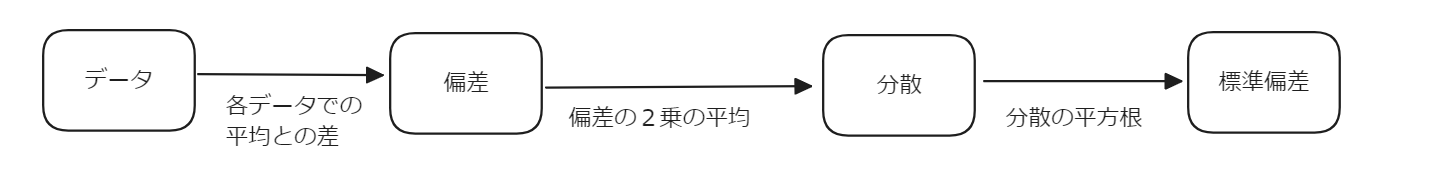


#### 偏差

$x_i - \bar{x}$

- 各データ点から平均値を引いた値
- 各データがどれだけ中心から逸脱しているか
- 平均からどのぐらい偏っているか
- 平均からどのぐらいズレているか
- 正と負の値がある
- 英語で deviation は基準からのズレ


#### 分散

$ \sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2$

- 偏差の２乗の平均
- 全体的なバラつき具合
- ２乗するので偏差が負でも正になる（正負を無視してバラつきを示せる）

#### 標準偏差

$\sigma = \sqrt{\sigma^2}$

- 分散の平方根
- 全体的なバラつき具合を示す
- 元の単位に戻す（分散で二乗されたから）


<img src="standard_deviation1.gif" alt="標準偏差" style="width:800px;"/>

In [16]:
%matplotlib notebook

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set random seed for reproducibility
np.random.seed(0)

# Generate sample data: 50 points with an approximate mean of 50 and standard deviation of 10
n_points = 50
data = np.random.randn(n_points) * 10 + 50

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.set_title("Histogram and Normal Distribution Overlay")

def update(frame):
    # Clear the axis for each new frame
    ax.cla()
    
    # Select current data up to frame index
    current_data = data[:frame + 1]
    
    # Plot histogram of the current data with density normalization
    counts, bins, patches = ax.hist(current_data, bins=10, density=True, alpha=0.6, color='blue', label='Histogram')
    
    # Calculate sample mean and standard deviation (using ddof=1)
    mean_val = np.mean(current_data)
    std_val = np.std(current_data, ddof=1) if len(current_data) > 1 else 0
    
    # Define x range based on histogram bin range
    x_min = bins[0]
    x_max = bins[-1]
    x = np.linspace(x_min, x_max, 200)
    
    # If there are at least two data points and std is nonzero, overlay the normal distribution PDF
    if len(current_data) > 1 and std_val != 0:
        pdf = (1 / (std_val * np.sqrt(2 * np.pi))) * np.exp(-((x - mean_val) ** 2) / (2 * std_val ** 2))
        ax.plot(x, pdf, 'r--', label='Normal PDF')
    
    # Set axis labels and title for current frame
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.set_title(f"Histogram and Normal Distribution Overlay (n = {len(current_data)})")
    ax.legend(loc="upper right")
    
    # Display current mean and standard deviation as text annotation
    ax.text(0.05, 0.95, f"Mean: {mean_val:.2f}\nStd Dev: {std_val:.2f}",
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
    
    # Optionally, maintain consistent x-axis limits
    ax.set_xlim(min(data) - 10, max(data) + 10)

# Create the animation and assign it to a variable to prevent garbage collection
anim = animation.FuncAnimation(fig, update, frames=n_points, interval=500, repeat=False)


gif_filename = "standard_deviation1.gif"
writer = animation.PillowWriter(fps=1)
anim.save(gif_filename, writer=writer)

#from IPython.display import HTML
#HTML(anim.to_jshtml())


<IPython.core.display.Javascript object>

<img src="standard_deviation2.gif" alt="標準偏差" style="width:800px;"/>

In [17]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set random seed for reproducibility
np.random.seed(0)

# Generate sample data: 50 points with an approximate mean of 50 and standard deviation of 10
n_points = 50
data = np.random.randn(n_points) * 10 + 50

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-1, n_points)
ax.set_ylim(min(data) - 10, max(data) + 10)
ax.set_xlabel('Data Index')
ax.set_ylabel('Value')
ax.set_title('Animation of Sample Standard Deviation Calculation')

def update(frame):
    # Clear the axis for the new frame
    ax.cla()
    
    # Get the current data up to the frame index
    current_data = data[:frame + 1]
    x = np.arange(len(current_data))
    
    # Calculate mean and sample standard deviation (using ddof=1)
    mean_val = np.mean(current_data)
    std_val = np.std(current_data, ddof=1) if len(current_data) > 1 else 0
    
    # Plot current data points
    ax.scatter(x, current_data, color='blue', label='Data Points')
    
    # Plot the mean as a horizontal dashed line
    ax.hlines(mean_val, -1, n_points, color='red', linestyle='--', label='Mean')
    
    # Draw dashed lines representing the deviation from the mean
    for i, y in enumerate(current_data):
        ax.plot([i, i], [y, mean_val], color='gray', linestyle=':')
    
    # Set axis limits and labels
    ax.set_xlim(-1, n_points)
    ax.set_ylim(min(data) - 10, max(data) + 10)
    ax.set_xlabel('Data Index')
    ax.set_ylabel('Value')
    ax.set_title(f'Animation of Sample Std. Deviation (n = {len(current_data)})')
    ax.legend(loc='upper right')
    
    # Display current mean and standard deviation on the plot
    ax.text(0.05, 0.95, f'Mean: {mean_val:.2f}\nStd. Dev.: {std_val:.2f}', 
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Create the animation and assign to a global variable to prevent garbage collection
anim = animation.FuncAnimation(fig, update, frames=n_points, interval=500, repeat=False)

gif_filename = "standard_deviation2.gif"
writer = animation.PillowWriter(fps=1)
anim.save(gif_filename, writer=writer)

# from IPython.display import HTML
# HTML(anim.to_jshtml())


<IPython.core.display.Javascript object>